# Strategic Insights: Unraveling Videogame Dynamics Through Comprehensive Data Analysis.

## UEES Disruptive Technologies Final Exam - Domenica Urdiales, Fabián Rodas, Paula Benalcázar

### About the dataset used in the notebook: Sales Analysis for Video Games in [1980,2016] Classified by Genre, Platform, Publisher, Region, Year.

### Bibliography:                                                                                                                                    https://github.com/raghav-19/Video-Games-Sales-Data-Analysis/blob/master/README.md                                                        https://public.tableau.com/app/profile/raghavraipuria/viz/VideoGameSales_15914816312660/GenreAnalysis                                           https://www.kaggle.com/code/gulsahdemiryurek/video-game-sales-exploratory-data-analysis                                                         https://chat.openai.com/

In [1]:
#We use these commands to import the packages we need to run the code below.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#This defines df as a variable that reads the csv file that we are going to use for the data analysis.
#pd. commands are part of the panda package that we already used.
df = pd.read_csv("vgsales.csv")

In [3]:
#Here we print the head or the first 5 rows of our dataset to ensure that the dataset has transfered properly.
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


## Global Sales by Genre

### This graph provides an **overview** of the global sales according to the genre in order to identify the best-selling games. It is a basic measure to understand how the market is behaving and which products are in high demand.

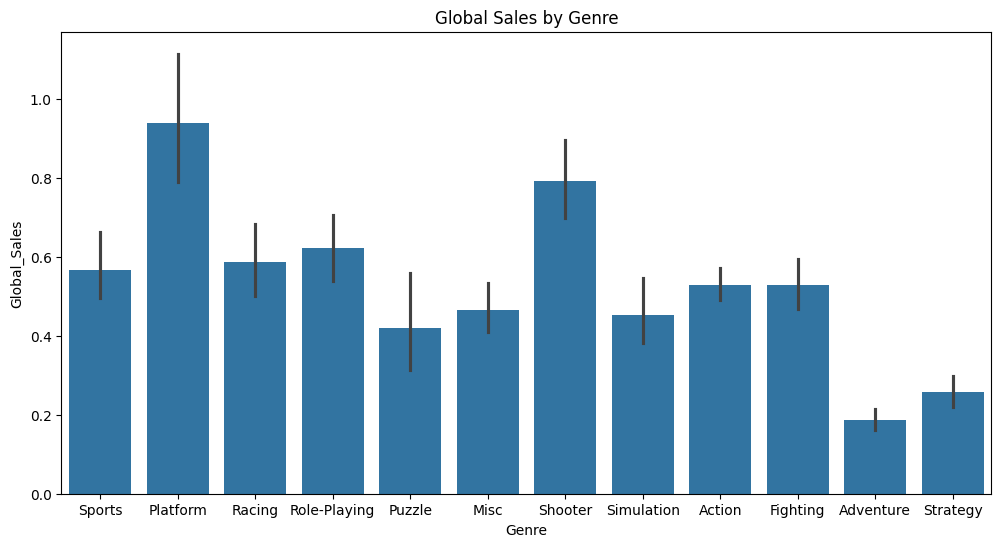

In [4]:
# This command serves to set the size of the graph (height, inches) 
plt.figure(figsize=(12, 6)) 

# Defines the name of the x and y-axis using df.
sns.barplot(x='Genre', y='Global_Sales', data=df) 

# Sets the title of the chart
plt.title('Global Sales by Genre') 

# Shows the graph
plt.show()      

## Trends in Videogames Global Sales Over Time

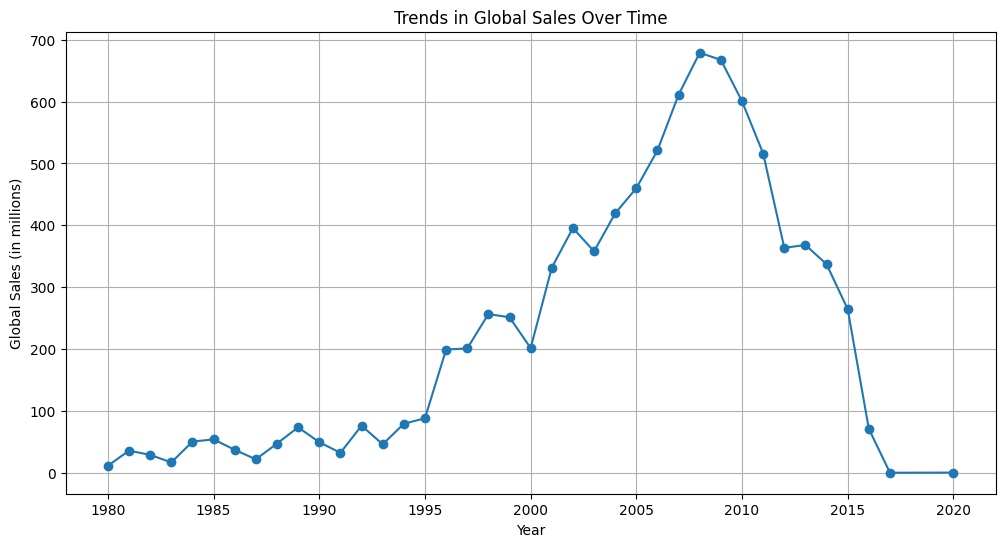

In [5]:
# Set up the figure size for the plot
plt.figure(figsize=(12, 6))

# Group the DataFrame by the 'Year' column and sum the 'Global_Sales' for each year
sales_by_year = df.groupby('Year')['Global_Sales'].sum()

# Plot the data as a line chart with markers ('o' for circles) at data points
sales_by_year.plot(marker='o')

# Set the title of the plot
plt.title('Trends in Global Sales Over Time')

# Label the x-axis as 'Year'
plt.xlabel('Year')

# Label the y-axis as 'Global Sales (in millions)
plt.ylabel('Global Sales (in millions)')

# Add a grid to the plot for better readability
plt.grid(True)

# Display the plot
plt.show()

## Comparison of Sales Among the Top Ten Most Used Platforms

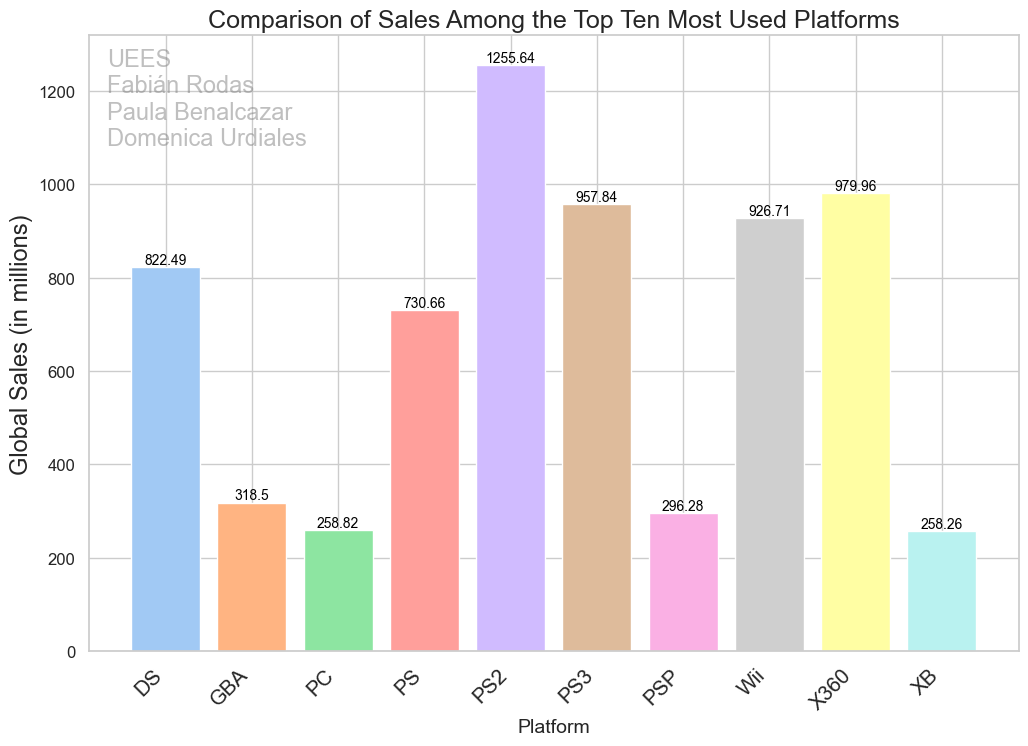

In [6]:
# Identify the top ten most used platforms
top_platforms = df['Platform'].value_counts().head(10).index

# Filter the original DataFrame to include only the top ten platforms
df_top_platforms = df[df['Platform'].isin(top_platforms)]

# Group the data by platform and calculate total sales per platform
sales_by_platform = df_top_platforms.groupby('Platform')['Global_Sales'].sum().reset_index()

# Use the Seaborn style for a more attractive look
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a bar chart with distinctive colors
colors = sns.color_palette("pastel")
bars =plt.bar(sales_by_platform['Platform'], sales_by_platform['Global_Sales'], color=colors)

# Add labels with numeric values above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom', fontsize=10, color='black')

# Add text in the top left corner as a "watermark"
plt.text(0.02, 0.98, '''UEES
Fabián Rodas
Paula Benalcazar
Domenica Urdiales''', transform=plt.gca().transAxes, fontsize=17,
         verticalalignment='top', color='gray', alpha=0.5)

# Customize the plot
plt.title('Comparison of Sales Among the Top Ten Most Used Platforms', fontsize=18)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Global Sales (in millions)', fontsize=17)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=12)

plt.show()

## Distribution of Global Sales Among Top Ten Publishers

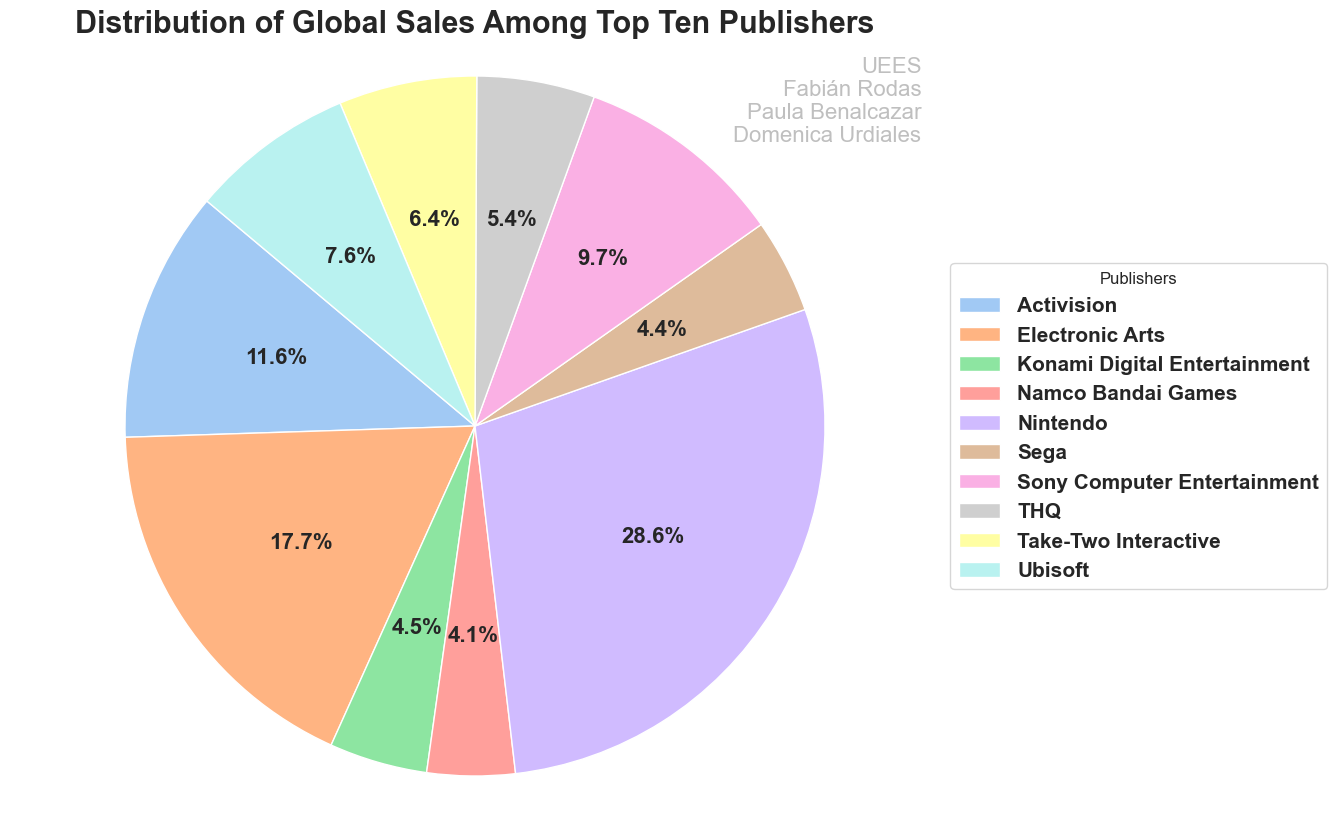

In [7]:
# Identify the top ten publishers
top_publishers = df['Publisher'].value_counts().head(10).index

# Filter the DataFrame to include only the top ten publishers
df_top_publishers = df[df['Publisher'].isin(top_publishers)]

# Group the data by publisher and calculate total sales per publisher
sales_by_publisher = df_top_publishers.groupby('Publisher')['Global_Sales'].sum()

# Create a user-friendly pie chart to visualize the distribution of global sales
plt.figure(figsize=(12, 10))

# Use a lighter color palette for better readability
colors = sns.color_palette('pastel', n_colors=len(sales_by_publisher))

# Use a bold font and increased font size
plt.pie(sales_by_publisher, labels=None, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 16, 'fontweight': 'bold'})

# Add text in the top right corner as a "watermark"
plt.text(0.98, 0.98, '''UEES
Fabián Rodas
Paula Benalcazar
Domenica Urdiales''', transform=plt.gca().transAxes, fontsize=16, horizontalalignment='right', verticalalignment='top', color='gray', alpha=0.5)

# Add a legend to identify colors with publishers
plt.legend(sales_by_publisher.index, title='Publishers', loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15, 'weight': 'bold'})

# Customize the chart for better readability and design
plt.title('Distribution of Global Sales Among Top Ten Publishers', fontsize=22, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

plt.show()

## Top 10 Games: Worldwide Sales

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_15624\3903175820.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Global_Sales', y='Name', data=df_world, palette=colors, label='Worldwide Sales')


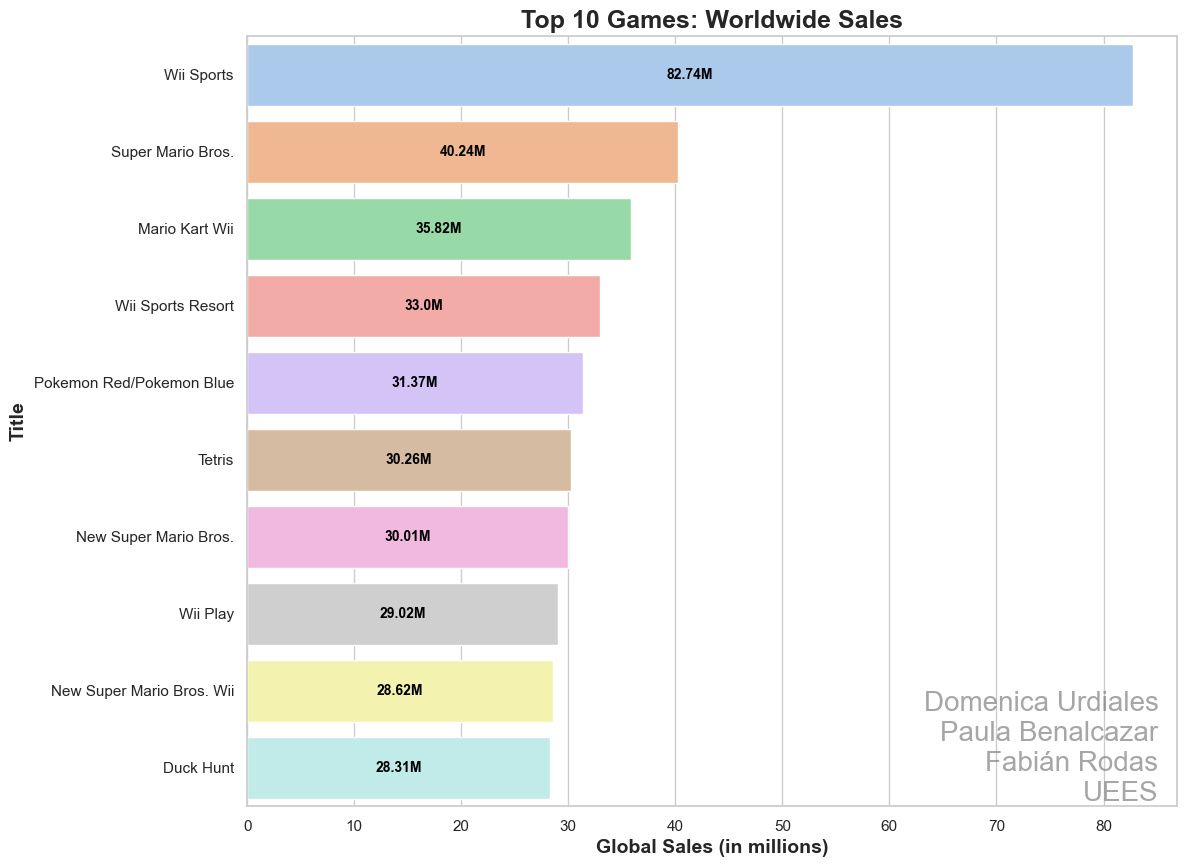

In [8]:
# Sort the DataFrame by global sales
df_world = df.sort_values(by='Global_Sales', ascending=False).head(10)

# Create a bar chart comparing the best-selling games in the USA vs worldwide
plt.figure(figsize=(12, 10))

# Use a lighter color palette
colors = sns.color_palette('pastel')

# Bar chart for the best-selling games worldwide
bars = sns.barplot(x='Global_Sales', y='Name', data=df_world, palette=colors, label='Worldwide Sales')

# Add text in the bottom right corner as a "watermark"
plt.text(0.98, 0.15, '''Domenica Urdiales
Paula Benalcazar
Fabián Rodas
UEES''', transform=plt.gca().transAxes, fontsize=20, horizontalalignment='right', verticalalignment='top', color='gray', alpha=0.7)

# Add value labels inside the bars for the top-selling games worldwide
for bar, value in zip(bars.patches, df_world['Global_Sales']):
    # Position the text at the center of each bar
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2,
             f'{value}M', ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Customize the chart
plt.title('Top 10 Games: Worldwide Sales', fontsize=18, fontweight='bold')
plt.xlabel('Global Sales (in millions)', fontsize=14, fontweight='bold')
plt.ylabel('Title', fontsize=14,fontweight='bold')

plt.show()

## Distribution of Games Over the Years (Segmented by 5 Years)

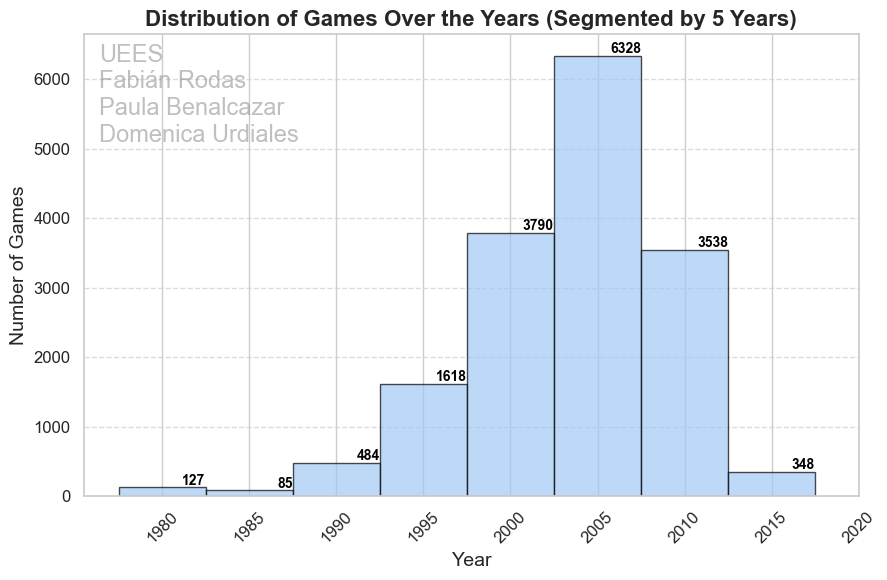

In [9]:
# Create a bar chart with a professional design
plt.figure(figsize=(10, 6))
# Use Seaborn's pastel color palette
sns.set_palette('pastel')

# Divide the years into segments of 5 years
bin_width = 5
bins = range(int(min(df['Year'])), int(max(df['Year']) + bin_width), bin_width)

# Create the bar chart
plt.bar(bins[:-1], pd.cut(df['Year'], bins).value_counts(sort=False), width=bin_width, edgecolor='black', alpha=0.7)

# Show the value of each bar on top of it
for x, value in zip(bins[:-1], pd.cut(df['Year'], bins).value_counts(sort=False)):
    plt.text(x + bin_width / 2, value + 0.1, f'{value}', ha='right', va='bottom', fontsize=10, fontweight='bold', color='black')
    
# Add text in the top left corner as a "watermark"
plt.text(0.02, 0.98, '''UEES
Fabián Rodas
Paula Benalcazar
Domenica Urdiales''', transform=plt.gca().transAxes, fontsize=17,
         verticalalignment='top', color='gray', alpha=0.5)    

plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)
plt.title('Distribution of Games Over the Years (Segmented by 5 Years)', fontsize=16, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(bins, rotation=45)
plt.tick_params(axis='both', which='both', labelsize=12)
plt.show()